
<div style="text-align: center;">
    <h1>Pharmaceuticals Analysis using Matplotlib</h1>
    <p>A Matplotlib.pyplot Project</p>
</div>

### Read in Dataset

In [1]:
# Libraries: import python dependencies/libraries to facilitate analysis.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# File Paths: Create variables that will identify where the file locations are, where the data is stored.
# These are the variables that hold the csv path location
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read Files: Create variables that will read in the data based on the file locations.
# These are the two variables that will read in the csv file data based on the path location variables already created.
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Test1: Call the data using the "read file" variables that were defined in the setup section.
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#Test2: The variables cannot be called in the same code block because it will call only the last line. Read the data using 
# the second defined variable.
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Merge the two datasets on the "Mouse ID" column. 
# Define variable and use pandas merge function (pd.merge) on "Mouse ID" so that no data is lost
merged_mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

merged_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Conduct Duplicates Analysis

In [5]:
# Unique Count:
# Display a list of each column with the .nunique function

merged_mouse_study.nunique() 

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [6]:
# Print Statement:
# Print a statement of how many Mouse ID's there are.

print("There are 249 Mouse IDs in this dataset.")

There are 249 Mouse IDs in this dataset.


In [7]:
# Finding All Duplicates:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
# Create a DataFrame that holds just the Mouse ID and Timepoints and assign it a variable name
mouse_timepoint_duplicates = pd.DataFrame(merged_mouse_study, columns=['Mouse ID', 'Timepoint'])
# Print the DataFrame
mouse_timepoint_duplicates

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [8]:
# Finding Duplicates (exclude first instances):
# Use pandas function ".duplicated" to find Mouse ID's with duplicates and remove first instances of duplicates.
duplicate_results = mouse_timepoint_duplicates[mouse_timepoint_duplicates.duplicated()]
# Create and print a header description for results
print("The duplicate Mouse ID/Timepoint rows, except for the first instances, are:")
# Print the findings
print(duplicate_results)

The duplicate Mouse ID/Timepoint rows, except for the first instances, are:
    Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20


In [9]:
# View Duplicate Data:
# Display all the data for the duplicate Mouse ID g989. 
# With the original merged dataset variable, use pandas locate (.loc) to find the desired column and associated row.
merged_mouse_study.loc[merged_mouse_study['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Clean Dataframe (Index/Delete rows):
# Create a clean DataFrame by dropping duplicate Mouse ID data associatd with g989.
# Index a row based on value 'g989' in the dataset and define it with a variable "delete_index_g989"
delete_index_g989 = merged_mouse_study[merged_mouse_study["Mouse ID"]== 'g989'].index
# Use pandas drop function (.drop), with g989 indexed variable to delete the g989 data from the dataset.
merged_mouse_study = merged_mouse_study.drop(delete_index_g989)
merged_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Re-count Mouse ID's:
# Checking the number of mice in the clean DataFrame. There should be one less Mouse ID than the previous count.
merged_mouse_study.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

In [12]:
# Print a new mouse count findings statment after dataset was cleaned
print("I searched the dataset, found one Mouse ID with duplicates and deleted all the data associated with that ID. There are now 248 unique mouse ID's")

I searched the dataset, found one Mouse ID with duplicates and deleted all the data associated with that ID. There are now 248 unique mouse ID's


### Summary of Duplicate Mouse ID Findings

This dataset includes numerous mouse drug trials, and while the small number of duplicates may seem insignificant—like a 
drop in the bucket—it’s important to ensure the dataset remains clean and consistent. Removing duplicates, even if they 
appear trivial, helps maintain the integrity of the analysis by ensuring all data points are unique and reliable. Although 
the single Mouse ID with duplicate entries in this case may not drastically impact the overall statistics, it's easy to 
imagine scenarios where duplicates could accumulate and skew results. Therefore, identifying and removing duplicates is not 
only good practice but a crucial step in data preprocessing.

### Generate Summary Statistics

In [13]:
# Unique Count: Column Specific
# With the already created merged dataset, to a unique count on the Drug Regimen column only.
merged_mouse_study['Drug Regimen'].nunique()

10

In [14]:
# Summary Statistics (Method One):
# Generate a summary statistics table of mean, median, variance, standard deviation/error of the tumor volume for each drug regimen.
# Use ".groupby" to calculate the properties of each drug regimen.
drug_regimen_group = merged_mouse_study.set_index('Drug Regimen').groupby(['Drug Regimen'])
# Define variables using "m_t_v" for mouse_tumor_volume and use pandas functions to calculate tumor volume statistics.
m_t_v_mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
m_t_v_median = drug_regimen_group['Tumor Volume (mm3)'].median()
m_t_v_variance = drug_regimen_group['Tumor Volume (mm3)'].var()
m_t_v_standard_deviation = drug_regimen_group['Tumor Volume (mm3)'].std()
m_t_v_standard_error = drug_regimen_group['Tumor Volume (mm3)'].sem()
# Create a Dataframe in Pandas that assembles the statistics.
m_t_v_dataframe = pd.DataFrame({"Mean":m_t_v_mean,"Median":m_t_v_median,
                                "Variance":m_t_v_variance,"Standard Deviation":m_t_v_standard_deviation,
                                "Standard Error":m_t_v_standard_error})

# Print the new DataFrame
m_t_v_dataframe

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Aggregation (Method Two):
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen
# Use pandas group function (.groupby) to group 'Drug Regimen' column and assign it a variable
drug_regimen_group = merged_mouse_study.groupby('Drug Regimen')
# Use pandas aggregation function (.agg) with the grouped variable to create a summary statistics table
aggregation_method = drug_regimen_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
# Print to screen
aggregation_method.head(10)

C:\Users\Mathew\AppData\Local\Temp\ipykernel_20604\2952071441.py:7: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  aggregation_method = drug_regimen_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
round_m_t_v_df = m_t_v_dataframe.round(2)  # Adjust to two decimal places
round_m_t_v_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [17]:
# CSS Style
# Center align all of the table headers and text within the table.
# Create uniform column width to make the dataframe more easily readable.
# Apply CSS styling to center headers
# Also, round the digit to two decimal places to make it even easier to read.


m_t_v_dataframe = m_t_v_dataframe.round(2)  # This rounds the number to two decimal places.

styled_df = m_t_v_dataframe.style.set_table_styles(
    [
        {
            'selector': 'th, td',  # Targets both headers and data cells
            'props': [
                ('text-align', 'center'),  # Center-align text
                ('width', '150px')        # Set uniform column width
            ]
        }
    ]
).set_properties(**{'text-align': 'center'}) \
 .format(precision=2, na_rep="")  # Format numbers to display only 2 decimals without trailing zeros

styled_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [18]:
### Bar and Pie Charts

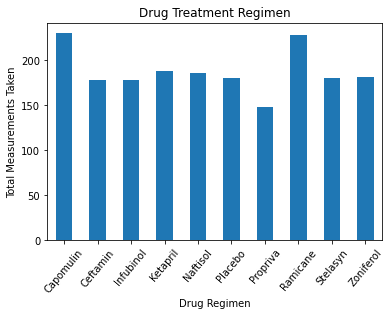

In [21]:
#Original Pandas Bar Chart Code:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Python dictionary for plot
bar_plot_dataframe = merged_mouse_study.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
# Load dictionary to dataframe
pandas_bar_plot = pd.DataFrame(bar_plot_dataframe)
# Use pandas funciton to create a bar chart 
pandas_bar_plot.plot.bar(legend=False,rot=50,title='Drug Treatment Regimen')
plt.ylabel("Total Measurements Taken")
#pandas_bar_plot
plt.show()

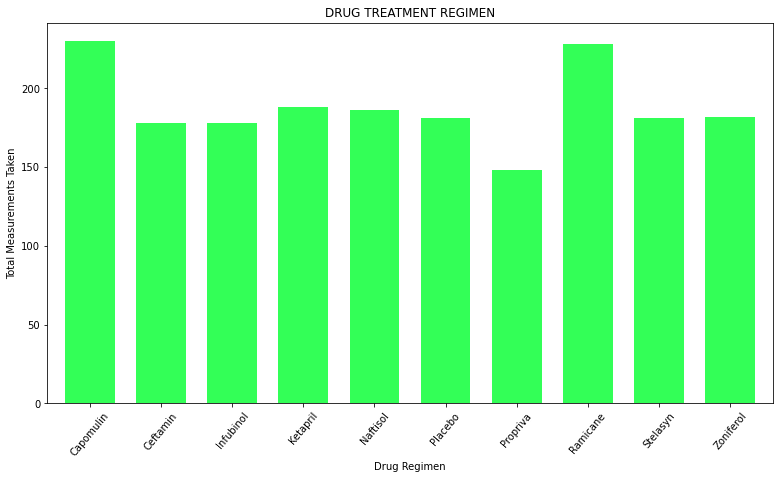

In [47]:
# Pandas Bar Chart
# Generate a pandas bar chart showing the total number of measurements taken on each drug regimen.
# Define a variable library to be loaded into the bar plot variable.
bar_plot_library = merged_mouse_study.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
# Load variable to pandas dataframe
fig, ax = plt.subplots(figsize=(13, 7))  # Adjust figure size
pandas_bar_plot = pd.DataFrame(bar_plot_library)
# Use pandas funciton "plot" to create a bar chart using the pandas dataframe variable. 
pandas_bar_plot.plot.bar(ax=ax, legend=False, rot=50, title='DRUG TREATMENT REGIMEN', color='#33ff57', width=0.7)
plt.ylabel("Total Measurements Taken")
#pandas_bar_plot
plt.show()

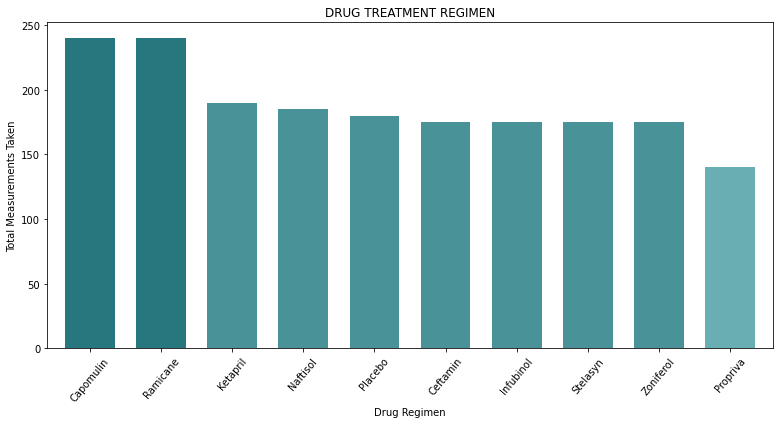

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame (replace with your actual data)
data = {'Drug Regimen': ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
        'Total Measurements': [240, 175, 175, 190, 185, 180, 140, 240, 175, 175]}
merged_mouse_dataset = pd.DataFrame(data)

# Prepare the data for plotting
bar_plot_dataframe = merged_mouse_dataset.set_index('Drug Regimen')['Total Measurements']

# Sort the data in descending order
bar_plot_dataframe = bar_plot_dataframe.sort_values(ascending=False)

# Define custom colors based on conditions
colors = ['#69aeb3' if value <= 150 else '#499298' if value <= 200 else '#26777e' for value in bar_plot_dataframe]

# Plot with custom colors
fig, ax = plt.subplots(figsize=(13, 6))
bar_plot_dataframe.plot.bar(
    ax=ax,
    legend=False,
    rot=50,
    title='DRUG TREATMENT REGIMEN',
    color=colors, # Apply custom colors
    width=.7
)

# Add labels
ax.set_ylabel("Total Measurements Taken")

# Display the plot
plt.show()
